In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix



# 1) Mengumpulkan data

In [2]:
df = pd.read_csv('diabetes.csv')

# Menampilkan isi Dataset
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


# 2) Menelaah data

**a. Menganalisis Tipe dan Relasi Data**

In [3]:
df = pd.DataFrame(df)

# Menampilkan tipe data setiap kolom
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# Menampilkan korelasi antar variabel
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.024118,-0.033523,0.490629,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.048117,0.137246,0.271462,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.159844,-0.002805,0.323235,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.275388,0.115016,0.147077,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.047218,0.130395,0.221721,0.303454
BMI,0.024118,0.048117,0.159844,0.275388,0.047218,1.000000,0.031274,0.123358,0.096973
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.031274,1.000000,0.020434,0.173844
Age,0.490629,0.271462,0.323235,0.147077,0.221721,0.123358,0.020434,1.000000,0.240541
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.096973,0.173844,0.240541,1.000000


**b. Menganalisis Karakteristik Data**

In [5]:
# Menampilkan statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,34.459577,0.471876,33.631510,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,29.371433,0.331329,13.872991,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.700000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,497.000000,2.420000,154.000000,1.000000


In [6]:
# Menampilkan distribusi data untuk setiap kolom
for column in df.columns:
  print(f"\nDistribusi data untuk {column:}")
  print(df[column].value_counts())


Distribusi data untuk Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Distribusi data untuk Glucose
100.0    17
99.0     17
111.0    14
106.0    14
129.0    14
         ..
182.0     1
65.0      1
178.0     1
67.0      1
56.0      1
Name: Glucose, Length: 135, dtype: int64

Distribusi data untuk BloodPressure
70.0     57
74.0     52
78.0     45
68.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
62.0     34
82.0     30
66.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
54.0     11
52.0     11
92.0      8
75.0      8
65.0      7
85.0      6
94.0      6
48.0      5
96.0      4
44.0      4
100.0     3
106.0     3
98.0      3
110.0     3
55.0      2
46.0      2
104.0     2
30.0      2
108.0     2
24.0      1
95.0      1
114.0     1
102.0     1
122.0     1
40.0  

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

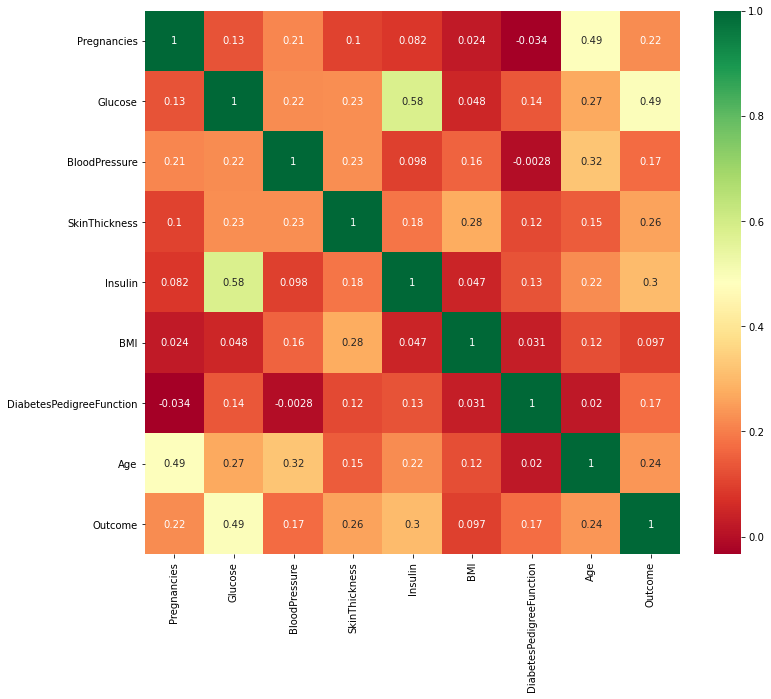

In [8]:
# heatmap
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')   

In [9]:
# from pandas.tools.plotting import scatter_matrix
# p=scatter_matrix(diabetes_data,figsize=(25, 25))

**c. Membuat Laporan Telaah Data**

# 3) Memvalidasi data

**a. Melakukan Pengecekan Kelengkapan Data**

In [10]:
df = pd.DataFrame(df)

# Pengecekan nilai yang hilang per kolom
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values)

# Pengecekan nilai yang hilang per baris
missing_values_per_row = df.isnull().sum(axis=1)
print("\nJumlah nilai yang hilang per baris:")
print(missing_values_per_row)

Jumlah nilai yang hilang per kolom:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Jumlah nilai yang hilang per baris:
0      1
1      1
2      2
3      0
4      0
      ..
763    0
764    1
765    0
766    2
767    1
Length: 768, dtype: int64


**b. Membuat Rekomendasi Kelengkapan Data**

In [11]:
df.fillna(0, inplace=True)
# mengisi nilai nan
comlumns_to_convert = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
# mengubah tipe data
df[comlumns_to_convert] =  df[comlumns_to_convert].astype(int)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 4) Menentukan objek data

**a. Memutuskan Kriteria dan Teknik Pemilihan Data**

In [12]:
# Pemilihan data berdasarkan kondisi tertentu (contoh: usia di atas 30)
selected_df = df[df['Age'] > 30]

# Menampilkan hasil
print(selected_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

**b. Menentukan Attributes (Columns) dan Records (Rows) Data**

In [13]:
# Memilih atribut dan target
selected_features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = df['Outcome']

# Menampilkan hasil
print("Atribut yang dipilih:")
print(selected_features)

print("\nKolom target:")
print(target)

Atribut yang dipilih:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1              

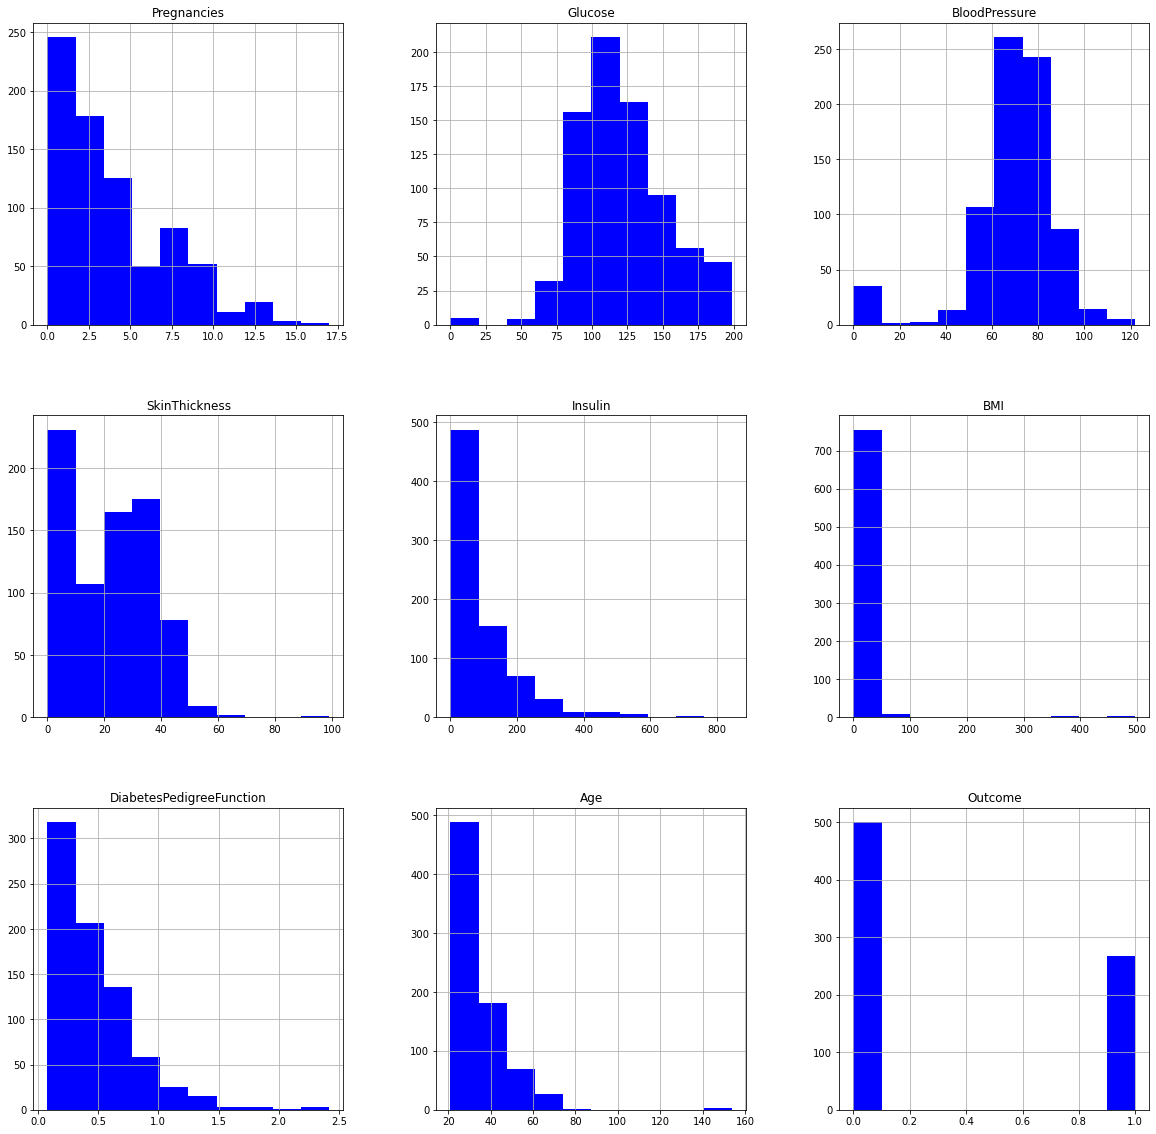

In [14]:
color = 'blue'

# Membuat histogram untuk setiap kolom
df.hist(figsize=(20, 20), color=color)
plt.show()

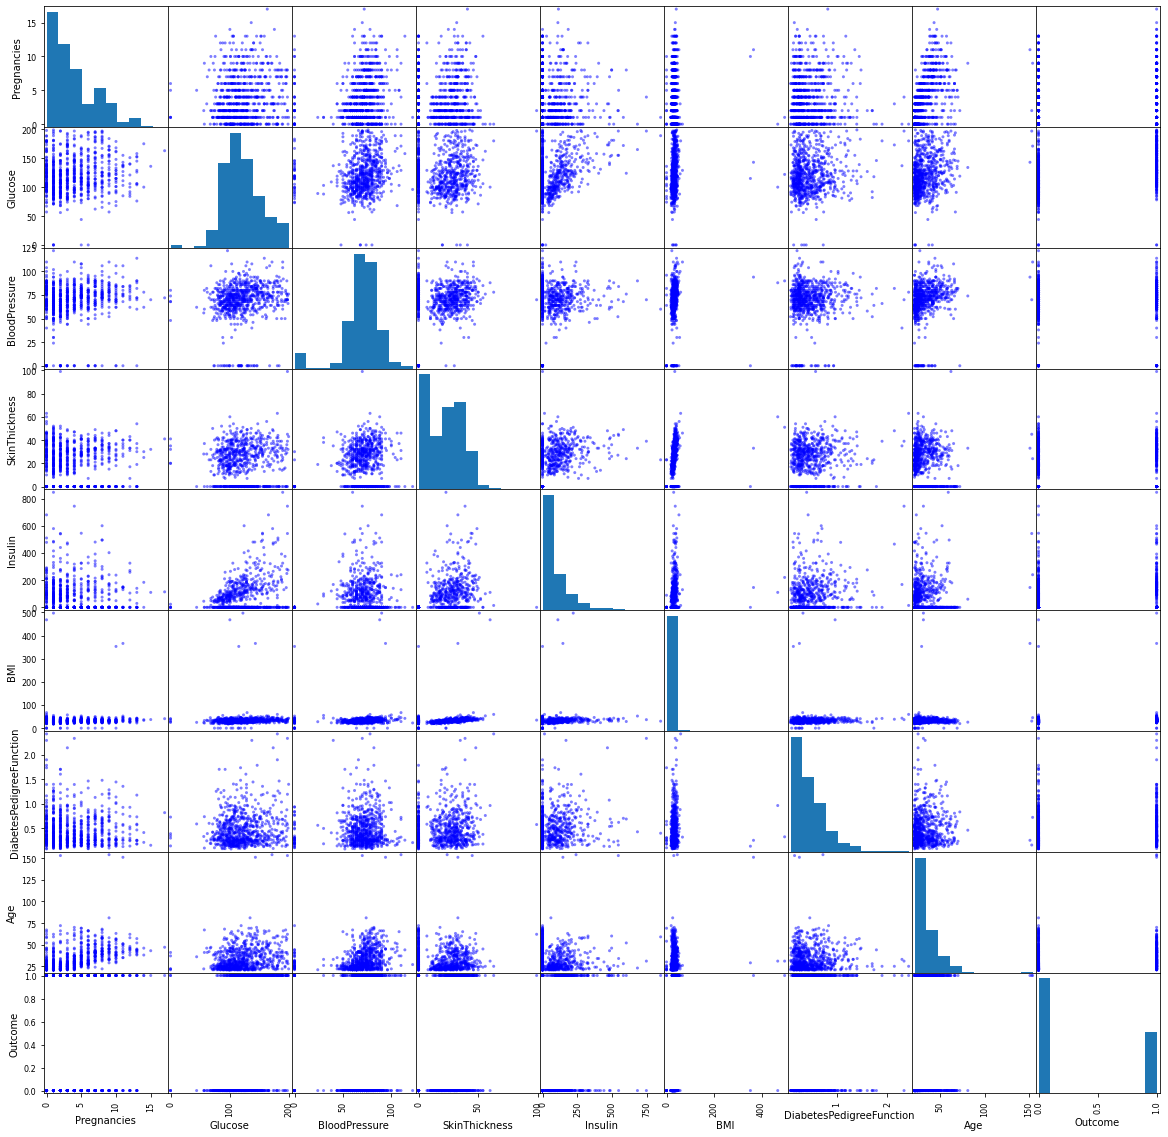

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20), color=color);

In [16]:
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# 5) Membersihkan data

**a. Melakukan Pembersihan Data yang Kotor**

In [17]:
# Mencari data duplikat
duplicate_rows = df.duplicated()

# Menampilkan baris yang merupakan duplikat
print("Rows with duplicates:")
print(df[duplicate_rows])

Rows with duplicates:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


**b. Membuat Laporan dan Rekomendasi Hasil Pembersihan Data**

# 6) Mengkonstruksi data

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Pilih fitur-fitur numerik
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Scaling fitur-fitur numerik
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# 7) Menentukan label data

**a. Melakukan Pelabelan Data**

In [19]:

# Menampilkan DataFrame sebelum pelabelan
print("DataFrame Sebelum Pelabelan:")
print(df)

# Labeling data
label_column = 'Outcome'  # Kolom yang akan dijadikan label
labels = df[label_column]

# DataFrame setelah pelabelan (tanpa kolom 'Outcome' yang sekarang menjadi label)
df = df.drop(columns=[label_column])

# Menampilkan DataFrame setelah pelabelan
print("\nDataFrame Setelah Pelabelan:")
print(df)

# Menampilkan label
print("\nLabel:")
print(labels)

DataFrame Sebelum Pelabelan:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  0.743719       0.590164       0.353535  0.000000  0.067606   
1              1  0.427136       0.540984       0.292929  0.000000  0.053521   
2              8  0.919598       0.524590       0.000000  0.000000  0.046881   
3              1  0.447236       0.540984       0.232323  0.111111  0.056539   
4              0  0.688442       0.327869       0.353535  0.198582  0.086720   
..           ...       ...            ...            ...       ...       ...   
763           10  0.507538       0.622951       0.484848  0.212766  0.066197   
764            2  0.613065       0.573770       0.272727  0.000000  0.074044   
765            5  0.608040       0.590164       0.232323  0.132388  0.052716   
766            1  0.633166       0.491803       0.000000  0.000000  0.060563   
767            1  0.467337       0.573770       0.313131  0.000000  0.061167   

     Diabe

**b. Membuat Laporan Hasil Pelabelan Data**


# Laporan Hasil Pelabelan Data

Statistik Deskriptif
Jumlah Observasi: 768
Jumlah Kelas: 2
Distribusi Kelas:
0    500
1    268
Name: Outcome, dtype: int64



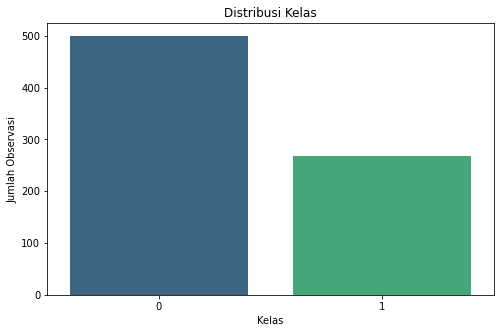

In [20]:
# Laporan hasil pelabelan data
labeling_report = """
# Laporan Hasil Pelabelan Data

Statistik Deskriptif
Jumlah Observasi: {}
Jumlah Kelas: {}
Distribusi Kelas:
{}
""".format(len(labels), labels.nunique(), labels.value_counts())

# Menampilkan laporan
print(labeling_report)

# Membuat diagram batang
plt.figure(figsize=(8, 5))
sns.countplot(x=labels, palette='viridis')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Observasi')
plt.show()

In [27]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

# 8) Membangun model

**a. Menyiapkan Parameter Model**

In [22]:
from sklearn.model_selection import train_test_split

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)


**b. Menggunakan Tools Pemodelan**

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# # Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report (Decision Tree):\n", classification_report(y_test, dt_pred))



# # Random Forest
# rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)
# rf_accuracy = accuracy_score(y_test, rf_pred)
# print("Random Forest Accuracy:", rf_accuracy)
# print("Classification Report (Random Forest):\n", classification_report(y_test, rf_pred))




# Membuat model regresi logistik
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Accuracy:", lr_accuracy)
print("Classification Report (Logistic):\n", classification_report(y_test, lr_pred))


Decision Tree Accuracy: 0.7467532467532467
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Logistic Accuracy: 0.7662337662337663
Classification Report (Logistic):
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



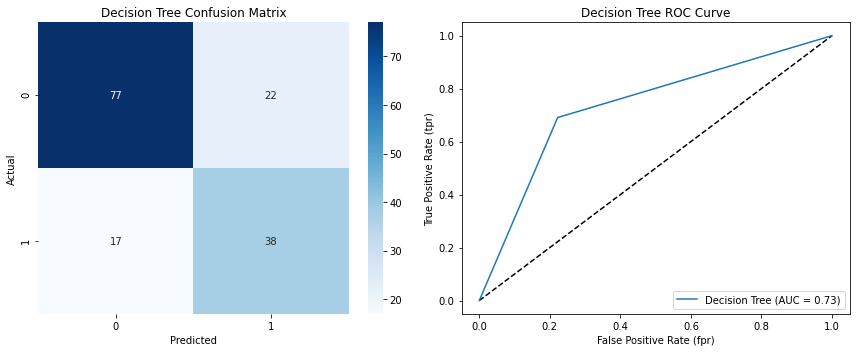

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

# ROC Curve
plt.subplot(1, 2, 2)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [25]:
# # Matriks Kebingungan (Confusion Matrix)
# cm = confusion_matrix(y_test, rf_pred)

# # Kurva ROC
# y_pred_proba = rf.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# # Heatmap Matriks 
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axs[0])
# axs[0].set_xlabel('Prediksi')
# axs[0].set_ylabel('Aktual')
# axs[0].set_title('Random Forest Confusion Matrix')

# # Plot Kurva ROC
# axs[1].plot([0, 1], [0, 1], 'k--')
# axs[1].plot(fpr, tpr, label='Random Forest')
# axs[1].set_xlabel('False Positive Rate (FPR)')
# axs[1].set_ylabel('True Positive Rate (TPR)')
# axs[1].set_title('Random Forest ROC Curve')

# # Menampilkan plot
# plt.tight_layout()
# plt.show()


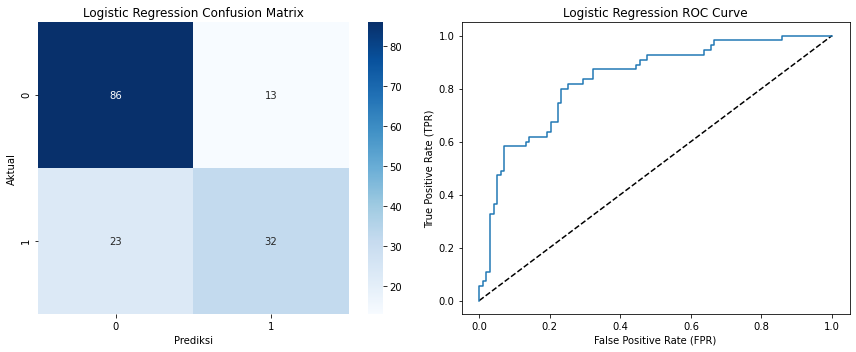

In [26]:
cm = confusion_matrix(y_test, lr_pred)

# Kurva ROC
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap Matriks 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axs[0])
axs[0].set_xlabel('Prediksi')
axs[0].set_ylabel('Aktual')
axs[0].set_title('Logistic Regression Confusion Matrix')

# Plot Kurva ROC
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].plot(fpr, tpr, label='Random Forest')
axs[1].set_xlabel('False Positive Rate (FPR)')
axs[1].set_ylabel('True Positive Rate (TPR)')
axs[1].set_title('Logistic Regression ROC Curve')

# Menampilkan plot
plt.tight_layout()
plt.show()